In [ ]:
# use finta indicators to simulate them in a machine learning and see if they work
# bootstrapping?

In [103]:
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
"""
Defining some constants for data mining
"""

NUM_DAYS = 30     # The number of days of historical data to retrieve
INTERVAL = '1d'     # Sample rate of historical data
symbol = 'AAPL'      # Symbol of the desired stock

# List of symbols for technical indicators
INDICATORS = ['SMA', 'SMM', 'SSMA', 'EMA', 'DEMA', 'TEMA', 'TRIMA', 'TRIX', 'VAMA', 'ER', 'KAMA', 'ZLEMA', 'WMA', 'HMA', 'EVWMA', 'VWAP', 'SMMA', 'FRAMA', 'MACD', 'PPO', 'VW_MACD', 'EV_MACD', 'MOM', 'ROC', 'RSI', 'IFT_RSI', 'TR', 'ATR', 'SAR', 'BBANDS', 'BBWIDTH', 'MOBO', 'PERCENT_B', 'KC', 'DO', 'DMI', 'ADX', 'PIVOT', 'PIVOT_FIB', 'STOCH', 'STOCHD', 'STOCHRSI', 'WILLIAMS', 'UO', 'AO', 'MI', 'VORTEX', 'KST', 'TSI', 'TP', 'ADL', 'CHAIKIN', 'MFI', 'OBV', 'WOBV', 'VZO', 'PZO', 'EFI', 'CFI', 'EBBP', 'EMV', 'CCI', 'COPP', 'BASP', 'BASPN', 'CMO', 'CHANDELIER', 'QSTICK', 'WTO', 'FISH', 'ICHIMOKU', 'APZ', 'VPT', 'FVE', 'VFI', 'MSD', 'STC']
# INDICATORS = ['SMA','SMM','SSMA','EMA','DEMA','TEMA','TRIMA','TRIX','VAMA','ER','KAMA','ZLEMA','WMA','HMA','EVWMA','VWAP','SMMA','FRAMA','MACD','PPO','VW_MACD','EV_MACD','MOM','ROC','RSI','IFT_RSI','TR','ATR','SAR','BBANDS','BBWIDTH','MOBO','PERCENT_B','KC','DO','DMI','ADX','PIVOT','PIVOT_FIB','STOCH','STOCHD','STOCHRSI','WILLIAMS','UO','AO','MI','VORTEX','KST','TSI','TP','ADL','CHAIKIN','MFI','OBV','WOBV','VZO','PZO','EFI','CFI','EBBP','EMV','CCI','COPP','BASP','BASPN','CMO','CHANDELIER','QSTICK','TMF','WTO','FISH','ICHIMOKU','APZ','SQZMI','VPT','FVE','VFI','MSD','STC','WAVEPM']
# 'WACEPM', 'TMF'
# SQueezeme SQZMI

[*********************100%***********************]  1 of 1 completed
                 open       high        low      close  Adj Close     volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  73.683571  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.967216  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  73.548622  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  73.202728  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  74.380287  132079200


<AxesSubplot:xlabel='Date'>

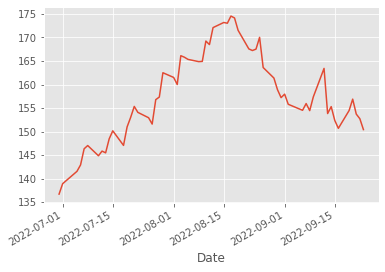

In [105]:
"""
Next we pull the historical data using yfinance
Rename the column names because finta uses the lowercase names
"""

start = (datetime.date.today() - datetime.timedelta(NUM_DAYS))
end = datetime.datetime.today()

data = yf.download(symbol, start='2020-01-01', end='2022-09-24', interval=INTERVAL)
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
print(data.head())

tmp = data.iloc[-60:]
tmp['close'].plot()

In [106]:
data = data.reset_index()

In [107]:
data['ret'] = data['close'].pct_change(1)

In [108]:
data

,Date,open,high,low,close,Adj Close,volume,ret
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.683571,135480400,NaN
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.967216,146322800,-0.009722
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.548622,118387200,0.007968
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.202728,108872000,-0.004703
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.380287,132079200,0.016086
...,...,...,...,...,...,...,...,...
683,2022-09-19,149.309998,154.559998,149.100006,154.479996,154.479996,81474200,0.025083
684,2022-09-20,153.399994,158.080002,153.080002,156.899994,156.899994,107689800,0.015665
685,2022-09-21,157.339996,158.740005,153.600006,153.720001,153.720001,101696800,-0.020268
686,2022-09-22,152.380005,154.470001,150.910004,152.740005,152.740005,86652500,-0.006375


<AxesSubplot:>

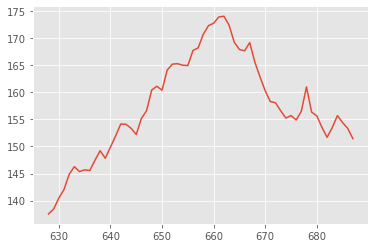

In [109]:
"""
Next we clean our data and perform feature engineering to create new technical indicator features that our
model can learn from
"""

def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """
    
    return data.ewm(alpha=alpha).mean()

data = _exponential_smooth(data, 0.65)

tmp1 = data.iloc[-60:]
tmp1['close'].plot()

In [110]:
ind_data = [('TA.' + i + '(data)') for i in INDICATORS]

df = pd.DataFrame(eval(ind_data[0]))

for i in ind_data[1:]:
    try:
        df[i] = eval(i)
        
    except:
        df[i] = eval(i).iloc[:,0]
    

In [111]:
len(df[df.columns[~df.isna().any()]].columns)

24

In [112]:
len(df.columns)

77

In [113]:
df1 = df[df.columns[~df.isna().any()]]

In [114]:
len(df1.columns)

24

In [115]:
df1

,TA.SSMA(data),TA.EMA(data),TA.DEMA(data),TA.TEMA(data),TA.EVWMA(data),TA.VWAP(data),TA.SMMA(data),TA.FRAMA(data),TA.MACD(data),TA.PPO(data),...,TA.TP(data),TA.ADL(data),TA.VZO(data),TA.PZO(data),TA.EBBP(data),TA.BASP(data),TA.BASPN(data),TA.FISH(data),TA.APZ(data),TA.VPT(data)
0,75.087502,75.087502,75.087502,75.087502,0.000000,74.678335,75.087502,75.087502,0.000000,0.000000,...,74.678335,1.229591e+08,0.000000,0.000000,0.062500,1.000000,1.000000,0.000000,77.792503,2.058507e+08
1,74.801226,74.787089,74.653572,74.594231,0.000000,74.626577,74.813872,74.546758,-0.012132,-0.016218,...,74.577715,1.109107e+08,-55.000507,-53.391616,0.349962,0.586215,0.782763,0.000000,77.239220,2.884241e+08
2,74.808459,74.800825,74.730134,74.732192,0.000000,74.568578,74.816171,74.820605,-0.006967,-0.009312,...,74.440613,2.021981e+08,0.587757,5.215533,0.234454,1.208864,0.939225,0.000000,77.348414,4.681983e+08
3,74.768511,74.757652,74.682361,74.680679,0.000000,74.582607,74.779172,74.673380,-0.009762,-0.013056,...,74.632131,2.151036e+08,-26.890370,-26.933082,0.397507,0.580760,0.835741,0.000000,77.288083,4.979301e+08
4,74.928137,74.951091,75.034092,75.144115,0.000000,74.690051,74.911054,75.407916,0.018153,0.024230,...,75.133337,2.812311e+08,5.734833,6.393312,0.845848,1.180844,0.919219,0.000000,77.601109,6.640160e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,157.627884,155.400404,152.781228,152.715178,157.733934,119.815055,157.077980,153.511140,-2.318274,-1.461053,...,152.293830,4.615633e+09,-33.944900,-28.974062,-2.595225,2.830031,1.299451,-1.942051,162.887797,8.419858e+09
684,157.414910,155.462547,153.416920,153.822919,157.607033,119.861847,157.045435,153.845475,-2.197766,-1.387022,...,154.715840,4.679823e+09,-14.083448,-11.892682,0.157040,2.599394,1.423255,-1.739745,162.748445,8.563326e+09
685,157.081797,155.253416,153.449610,153.967865,157.416445,119.907987,156.982851,153.932314,-2.181548,-1.379389,...,155.130213,4.636239e+09,-26.388926,-23.487781,1.801997,0.939236,1.377158,-1.337531,162.434092,8.515052e+09
686,156.664588,154.868116,153.116831,153.573452,157.201886,119.947419,156.895805,153.849153,-2.230931,-1.413809,...,153.554910,4.620768e+09,-35.890742,-33.512535,-0.090204,0.982072,1.339531,-1.144971,161.986373,8.506873e+09


In [116]:
df1['returns'] = data['ret']

<ipython-input-116-1bac87412965>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['returns'] = data['ret']


In [117]:
df1

,TA.SSMA(data),TA.EMA(data),TA.DEMA(data),TA.TEMA(data),TA.EVWMA(data),TA.VWAP(data),TA.SMMA(data),TA.FRAMA(data),TA.MACD(data),TA.PPO(data),...,TA.ADL(data),TA.VZO(data),TA.PZO(data),TA.EBBP(data),TA.BASP(data),TA.BASPN(data),TA.FISH(data),TA.APZ(data),TA.VPT(data),returns
0,75.087502,75.087502,75.087502,75.087502,0.000000,74.678335,75.087502,75.087502,0.000000,0.000000,...,1.229591e+08,0.000000,0.000000,0.062500,1.000000,1.000000,0.000000,77.792503,2.058507e+08,NaN
1,74.801226,74.787089,74.653572,74.594231,0.000000,74.626577,74.813872,74.546758,-0.012132,-0.016218,...,1.109107e+08,-55.000507,-53.391616,0.349962,0.586215,0.782763,0.000000,77.239220,2.884241e+08,-0.009722
2,74.808459,74.800825,74.730134,74.732192,0.000000,74.568578,74.816171,74.820605,-0.006967,-0.009312,...,2.021981e+08,0.587757,5.215533,0.234454,1.208864,0.939225,0.000000,77.348414,4.681983e+08,0.003382
3,74.768511,74.757652,74.682361,74.680679,0.000000,74.582607,74.779172,74.673380,-0.009762,-0.013056,...,2.151036e+08,-26.890370,-26.933082,0.397507,0.580760,0.835741,0.000000,77.288083,4.979301e+08,-0.002109
4,74.928137,74.951091,75.034092,75.144115,0.000000,74.690051,74.911054,75.407916,0.018153,0.024230,...,2.812311e+08,5.734833,6.393312,0.845848,1.180844,0.919219,0.000000,77.601109,6.640160e+08,0.009898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,157.627884,155.400404,152.781228,152.715178,157.733934,119.815055,157.077980,153.511140,-2.318274,-1.461053,...,4.615633e+09,-33.944900,-28.974062,-2.595225,2.830031,1.299451,-1.942051,162.887797,8.419858e+09,0.012148
684,157.414910,155.462547,153.416920,153.822919,157.607033,119.861847,157.045435,153.845475,-2.197766,-1.387022,...,4.679823e+09,-14.083448,-11.892682,0.157040,2.599394,1.423255,-1.739745,162.748445,8.563326e+09,0.014434
685,157.081797,155.253416,153.449610,153.967865,157.416445,119.907987,156.982851,153.932314,-2.181548,-1.379389,...,4.636239e+09,-26.388926,-23.487781,1.801997,0.939236,1.377158,-1.337531,162.434092,8.515052e+09,-0.008122
686,156.664588,154.868116,153.116831,153.573452,157.201886,119.947419,156.895805,153.849153,-2.230931,-1.413809,...,4.620768e+09,-35.890742,-33.512535,-0.090204,0.982072,1.339531,-1.144971,161.986373,8.506873e+09,-0.006987


In [119]:
df1 = df1.dropna()

Y = df1['returns']
X = df1.iloc[:,:-1]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

In [120]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                returns   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.09
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.54e-191
Time:                        14:39:21   Log-Likelihood:                 2407.6
No. Observations:                 687   AIC:                            -4765.
Df Residuals:                     662   BIC:                            -4652.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0119      0.015      0.779      0.437      -0.018       0.042
TA.SSMA(data)        0.0535      0.014      3.801      0.000       0.026       0.081
TA.EMA(data)        -0.1174      0.023     -5.168      0.000      -0.162      -0.073
TA.DEMA(data)        0.0697      0.012      5.971      0.000       0.047       0.093
TA.TEMA(data)       -0.0310      0.004     -8.578      0.000      -0.038      -0.024
TA.EVWMA(data)       0.0002   4.96e-05      3.054      0.002    5.41e-05       0.000
TA.VWAP(data)       -0.0003      0.000     -1.009      0.313      -0.001       0.000
TA.SMMA(data)        0.0008      0.000      1.686      0.092      -0.000       0.002
TA.FRAMA(data)      -0.0007      0.000     -3.941      0.000      -0.001      -0.000
TA.MACD(data)        0.0124      0.005      2.469      0.014       0.003       0.022
TA.PPO(data)        -0.0008      0.001     -1.220      0.223      -0.002       0.001
TA.VW_MACD(data)    -0.0025      0.001     -2.219      0.027      -0.005      -0.000
TA.EV_MACD(data)    -0.0001   6.51e-05     -1.627      0.104      -0.000    2.19e-05
TA.TR(data)          0.0027      0.001      2.956      0.003       0.001       0.004
TA.SAR(data)     -6.101e-05      0.000     -0.500      0.617      -0.000       0.000
TA.TP(data)          0.0230      0.001     16.413      0.000       0.020       0.026
TA.ADL(data)     -2.707e-12   3.53e-12     -0.768      0.443   -9.63e-12    4.22e-12
TA.VZO(data)         0.0002   7.52e-05      2.419      0.016    3.43e-05       0.000
TA.PZO(data)        -0.0002   7.39e-05     -2.419      0.016      -0.000   -3.36e-05
TA.EBBP(data)       -0.0138      0.001    -10.192      0.000      -0.017      -0.011
TA.BASP(data)        0.0085      0.001     12.470      0.000       0.007       0.010
TA.BASPN(data)      -0.0028      0.002     -1.856      0.064      -0.006       0.000
TA.FISH(data)        0.0006      0.000      1.777      0.076    -6.2e-05       0.001
TA.APZ(data)         0.0022      0.000      5.242      0.000       0.001       0.003
TA.VPT(data)      1.632e-12   1.02e-12      1.597      0.111   -3.75e-13    3.64e-12
==============================================================================
Omnibus:                       96.375   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.574
Skew:                          -0.072   Prob(JB):                    5.49e-228
Kurtosis:                       9.045   Cond. No.                     7.26e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.26e+11. This might indicate that there are
strong multicollinearity or other numerical probl

In [122]:
df1.corr()

,TA.SSMA(data),TA.EMA(data),TA.DEMA(data),TA.TEMA(data),TA.EVWMA(data),TA.VWAP(data),TA.SMMA(data),TA.FRAMA(data),TA.MACD(data),TA.PPO(data),...,TA.ADL(data),TA.VZO(data),TA.PZO(data),TA.EBBP(data),TA.BASP(data),TA.BASPN(data),TA.FISH(data),TA.APZ(data),TA.VPT(data),returns
TA.SSMA(data),1.000000,0.998187,0.991313,0.989079,0.943671,0.938679,0.978431,0.993844,0.034177,-0.018969,...,0.934442,-0.172855,-0.200595,0.002018,-0.023114,-0.052327,-0.194224,0.997236,0.817404,-0.089632
TA.EMA(data),0.998187,1.000000,0.997337,0.995609,0.939976,0.928687,0.968877,0.997691,0.091453,0.035724,...,0.936095,-0.128693,-0.157089,0.051587,-0.026527,-0.052805,-0.143132,0.998899,0.825540,-0.081413
TA.DEMA(data),0.991313,0.997337,1.000000,0.999479,0.931732,0.915378,0.955252,0.997504,0.152052,0.093758,...,0.934932,-0.068993,-0.098326,0.117940,-0.031100,-0.052363,-0.077655,0.995593,0.831235,-0.066497
TA.TEMA(data),0.989079,0.995609,0.999479,1.000000,0.930745,0.915288,0.954515,0.996198,0.152470,0.094305,...,0.935565,-0.050277,-0.080130,0.139988,-0.030959,-0.049190,-0.063037,0.993229,0.831923,-0.055646
TA.EVWMA(data),0.943671,0.939976,0.931732,0.930745,1.000000,0.881250,0.929374,0.935308,-0.010487,-0.049570,...,0.945965,-0.166842,-0.186935,0.003435,-0.031588,-0.046103,-0.199064,0.942024,0.869367,-0.065278
TA.VWAP(data),0.938679,0.928687,0.915378,0.915288,0.881250,1.000000,0.981013,0.925150,-0.156707,-0.206730,...,0.922359,-0.196701,-0.222720,-0.074223,-0.037439,-0.112432,-0.233523,0.921986,0.778932,-0.083447
TA.SMMA(data),0.978431,0.968877,0.955252,0.954515,0.929374,0.981013,1.000000,0.962272,-0.131057,-0.178269,...,0.927128,-0.218141,-0.244810,-0.072653,-0.032256,-0.080712,-0.260227,0.964173,0.788337,-0.088082
TA.FRAMA(data),0.993844,0.997691,0.997504,0.996198,0.935308,0.925150,0.962272,1.000000,0.121145,0.065242,...,0.939390,-0.095590,-0.124201,0.084633,-0.025782,-0.052862,-0.106363,0.996512,0.834382,-0.064039
TA.MACD(data),0.034177,0.091453,0.152052,0.152470,-0.010487,-0.156707,-0.131057,0.121145,1.000000,0.955167,...,0.058161,0.586307,0.577731,0.684009,-0.026224,0.013446,0.715999,0.096791,0.177824,0.074363
TA.PPO(data),-0.018969,0.035724,0.093758,0.094305,-0.049570,-0.206730,-0.178269,0.065242,0.955167,1.000000,...,0.029074,0.598574,0.598755,0.653188,-0.033843,-0.091195,0.717737,0.041207,0.174631,0.088729


[]

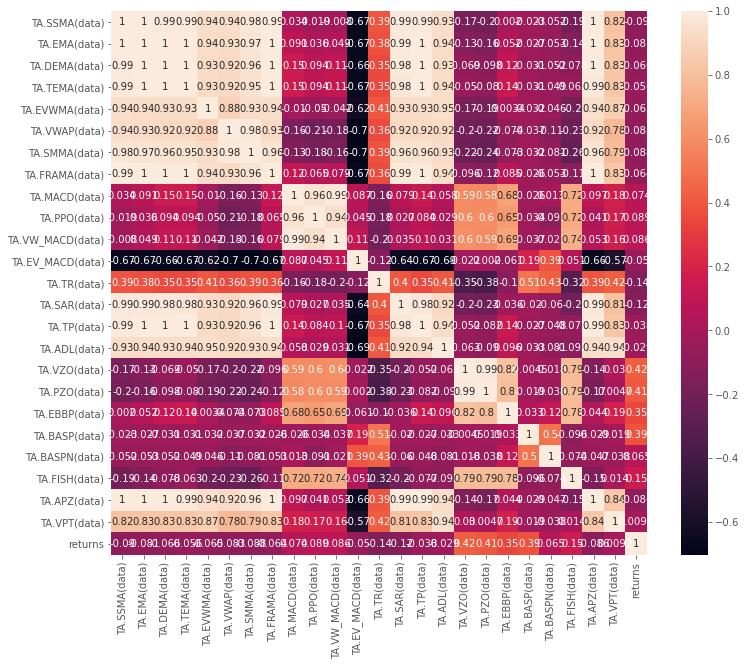

In [123]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
figsize = (15, 8)

ax, fig = plt.subplots(figsize=(12,10))
sns.heatmap(df1.corr(),annot=True)
plt.plot()

In [ ]:
def _get_indicator_data(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    :return:
    """
    print('STARTING')
    for indicator in INDICATORS:
        print(indicator)
        try:
            ind_data = eval('TA.' + indicator + '(data)')
            
            if not isinstance(ind_data, pd.DataFrame):
                ind_data = ind_data.to_frame()
            data = data.merge(ind_data, left_index=True, right_index=True)
#         data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)
        except:
            print('error' + indicator)
#             print(indicator + 'error')
#             print('TA.' + indicator + '(data)')
#         Also calculate moving averages for features
#     data['ema50'] = data['close'] / data['close'].ewm(50).mean()
#     data['ema21'] = data['close'] / data['close'].ewm(21).mean()
#     data['ema15'] = data['close'] / data['close'].ewm(14).mean()
#     data['ema5'] = data['close'] / data['close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
#     data['normVol'] = data['volume'] / data['volume'].ewm(5).mean()

    # Remove columns that won't be used as features
#     del (data['open'])
#     del (data['high'])
#     del (data['low'])
#     del (data['volume'])
#     del (data['Adj Close'])
        
    
    return data

data = _get_indicator_data(data)
print(data.columns)

In [ ]:
data.columns

In [ ]:
def _produce_prediction(data, window):
    """
    Function that produces the 'truth' values
    At a given row, it looks 'window' rows ahead to see if the price increased (1) or decreased (0)
    :param window: number of days, or rows to look ahead to see what the price did
    """
    
    prediction = (data.shift(-window)['close'] >= data['close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(data, window=15)
del (data['close'])
data = data.dropna() # Some indicators produce NaN values for the first few rows, we just remove them here
data

In [ ]:
def _train_random_forest(X_train, y_train, X_test, y_test):

    """
    Function that uses random forest classifier to train the model
    :return:
    """
    
    # Create a new random forest classifier
    rf = RandomForestClassifier()
    
    # Dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [110,130,140,150,160,180,200]}
    
    # Use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    
    # Fit model to training data
    rf_gs.fit(X_train, y_train)
    
    # Save best model
    rf_best = rf_gs.best_estimator_
    
    # Check best n_estimators value
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
    
rf_model = _train_random_forest(X_train, y_train, X_test, y_test)

In [ ]:
def _ensemble_model(rf_model, knn_model, gbt_model, X_train, y_train, X_test, y_test):
    
    # Create a dictionary of our models
    estimators=[('knn', knn_model), ('rf', rf_model), ('gbt', gbt_model)]
    
    # Create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='hard')
    
    #fit model to training data
    ensemble.fit(X_train, y_train)
    
    #test our model on the test data
    print(ensemble.score(X_test, y_test))
    
    prediction = ensemble.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return ensemble
    
ensemble_model = _ensemble_model(rf_model, knn_model, gbt_model, X_train, y_train, X_test, y_test)

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break
        
        y = df['pred']
        features = [x for x in df.columns if x not in ['pred']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)

In [ ]:
def cross_Validation(data):

    # Split data into equal partitions of size len_train
    
    num_train = 10 # Increment of how many starting points (len(data) / num_train  =  number of train-test sets)
    len_train = 40 # Length of each train-test set
    
    # Lists to store the results from each model
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        # Partition the data into chunks of size len_train every num_train days
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break
        
        y = df['pred']
        features = [x for x in df.columns if x not in ['pred']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)
        
        rf_model = _train_random_forest(X_train, y_train, X_test, y_test)
        knn_model = _train_KNN(X_train, y_train, X_test, y_test)
        ensemble_model = _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test)
        
        rf_prediction = rf_model.predict(X_test)
        knn_prediction = knn_model.predict(X_test)
        ensemble_prediction = ensemble_model.predict(X_test)
        
        print('rf prediction is ', rf_prediction)
        print('knn prediction is ', knn_prediction)
        print('ensemble prediction is ', ensemble_prediction)
        print('truth values are ', y_test.values)
        
        rf_accuracy = accuracy_score(y_test.values, rf_prediction)
        knn_accuracy = accuracy_score(y_test.values, knn_prediction)
        ensemble_accuracy = accuracy_score(y_test.values, ensemble_prediction)
        
        print(rf_accuracy, knn_accuracy, ensemble_accuracy)
        rf_RESULTS.append(rf_accuracy)
        knn_RESULTS.append(knn_accuracy)
        ensemble_RESULTS.append(ensemble_accuracy)
        
        
    print('RF Accuracy = ' + str( sum(rf_RESULTS) / len(rf_RESULTS)))
    print('KNN Accuracy = ' + str( sum(knn_RESULTS) / len(knn_RESULTS)))
    print('Ensemble Accuracy = ' + str( sum(ensemble_RESULTS) / len(ensemble_RESULTS)))
    
    
cross_Validation(data)

In [ ]:
import re

In [ ]:
a = """* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'
* Mark Whistler's WAVE PM 'WAVEPM'
"""

In [ ]:
a = re.findall(r"'(\w+)'", a)

In [ ]:
a